## Car price Predicter

In [72]:
import numpy as np;import pandas as pd

In [73]:
data = pd.read_csv('data.txt',sep=',',encoding= 'unicode_escape')
data.head()

,Brand,Model,Age,Engine,fuel_type,Milage,Gear box,Price
0,Jeep,Wrangler,-6.0,3.6,Benzin,33 000,Avtomat,39 500 $
1,Mercedes,AMG GT 43,-2.0,3.0,Benzin,15 000,Avtomat,129 000 $
2,Ford,Fusion,-2.0,2.0,Benzin,52 500,Avtomat,34 800 AZN
3,Kia,Sportage,-8.0,2.4,Benzin,136 200,Avtomat,30 000 AZN
4,LADA (VAZ),Niva,-7.0,1.7,Benzin,167 000,Mexaniki,12 000 AZN


### While discovering data we can see some problems

#### 1. The currencies for price are not same

#### 2. There is mistake in measuring Age of cars

#### 3. Nan values

#### 4. We need to combine Brand and Model columns, Such that there is no sense to want price of models that not belong to brand


In [74]:

#Gather price column to same currency
#Also i realized that we have string prices that represent Euro sign as a \x80

for row in range(len(data['Price'])):
    # Converting string Dollar to integer AZN
    if str(data['Price'][row])[-1] == '$':
        
        data['Price'][row] = int(     data['Price'][row][:-1].replace(' ','')      )*1.7
    
    # Converting string AZN to integer AZN
    elif str(data['Price'][row])[-1] == 'N':
        
        data['Price'][row] = int(      data['Price'][row][:-3].replace(' ','')     )
        
    elif str(data['Price'][row])[-2] == '¿':
        data['Price'][row] = int(      data['Price'][row][:-3].replace(' ','')     )
        
    # Converting string Euro to integer AZN
    elif  str(data['Price'][row])[-1] =='': #  represent Euro sign -it is a character encoding issue
        data['Price'][row] = int(     data['Price'][row][:-1].replace(' ','')      )*2
data


C:\Users\Ilkin\AppData\Local\Temp/ipykernel_5612/105108443.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'][row] = int(     data['Price'][row][:-1].replace(' ','')      )*1.7
C:\Users\Ilkin\AppData\Local\Temp/ipykernel_5612/105108443.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'][row] = int(      data['Price'][row][:-3].replace(' ','')     )
C:\Users\Ilkin\AppData\Local\Temp/ipykernel_5612/105108443.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

,Brand,Model,Age,Engine,fuel_type,Milage,Gear box,Price
0,Jeep,Wrangler,-6.0,3.6,Benzin,33 000,Avtomat,67150.0
1,Mercedes,AMG GT 43,-2.0,3.0,Benzin,15 000,Avtomat,219300.0
2,Ford,Fusion,-2.0,2.0,Benzin,52 500,Avtomat,34800
3,Kia,Sportage,-8.0,2.4,Benzin,136 200,Avtomat,30000
4,LADA (VAZ),Niva,-7.0,1.7,Benzin,167 000,Mexaniki,12000
...,...,...,...,...,...,...,...,...
17850,Hyundai,Sonata,-13.0,2.4,Benzin,184 000,Avtomat,18000
17851,Toyota,Prius,-16.0,1.5,Hibrid,221 000,Variator,12700
17852,Land Rover,Discovery,-2.0,3.0,Benzin,31 500,Avtomat,97750.0
17853,Toyota,Camry,-11.0,3.5,Benzin,207 000,Avtomat,24599


In [75]:
## Fixing Age subraction problem
data['Age'] = data['Age']*(-1)

In [76]:
#Combine Model And Brand Name columns under Model column
data['Model'] = data['Brand']+' '+data['Model']
data = data.drop('Brand',axis='columns')

In [77]:
# data= data.drop_duplicates()

In [78]:
data

,Model,Age,Engine,fuel_type,Milage,Gear box,Price
0,Jeep Wrangler,6.0,3.6,Benzin,33 000,Avtomat,67150.0
1,Mercedes AMG GT 43,2.0,3.0,Benzin,15 000,Avtomat,219300.0
2,Ford Fusion,2.0,2.0,Benzin,52 500,Avtomat,34800
3,Kia Sportage,8.0,2.4,Benzin,136 200,Avtomat,30000
4,LADA (VAZ) Niva,7.0,1.7,Benzin,167 000,Mexaniki,12000
...,...,...,...,...,...,...,...
17850,Hyundai Sonata,13.0,2.4,Benzin,184 000,Avtomat,18000
17851,Toyota Prius,16.0,1.5,Hibrid,221 000,Variator,12700
17852,Land Rover Discovery,2.0,3.0,Benzin,31 500,Avtomat,97750.0
17853,Toyota Camry,11.0,3.5,Benzin,207 000,Avtomat,24599


In [79]:
data['Model'].value_counts(dropna=False)

Chevrolet Cruze           570
Toyota Prius              502
Land Rover Range Rover    493
LADA (VAZ) Niva           425
Toyota Land Cruiser       392
                         ... 
Iveco Otoyol                1
Isuzu NPR 66 L              1
Lexus GS 300                1
Kia Carens                  1
GAZ 66                      1
Name: Model, Length: 596, dtype: int64

In [80]:
## There are some columns with Nan values. We want to delete them before upcoming operations

#The most important factors was chosen from headers ( Model -> Engine -> Milage -> Price)
# * How ever if we want do delete all rows that contain Nan in order to get clean model at the end

data.dropna(subset=data.columns,inplace=True)
data

,Model,Age,Engine,fuel_type,Milage,Gear box,Price
0,Jeep Wrangler,6.0,3.6,Benzin,33 000,Avtomat,67150.0
1,Mercedes AMG GT 43,2.0,3.0,Benzin,15 000,Avtomat,219300.0
2,Ford Fusion,2.0,2.0,Benzin,52 500,Avtomat,34800
3,Kia Sportage,8.0,2.4,Benzin,136 200,Avtomat,30000
4,LADA (VAZ) Niva,7.0,1.7,Benzin,167 000,Mexaniki,12000
...,...,...,...,...,...,...,...
17850,Hyundai Sonata,13.0,2.4,Benzin,184 000,Avtomat,18000
17851,Toyota Prius,16.0,1.5,Hibrid,221 000,Variator,12700
17852,Land Rover Discovery,2.0,3.0,Benzin,31 500,Avtomat,97750.0
17853,Toyota Camry,11.0,3.5,Benzin,207 000,Avtomat,24599


### If we have less than 10 rows about certain Model we wanna drop it, even if we have more than 10 rows but they actually represent same type of data we wanna drop this type of models.

In [81]:
## Figure out how many different model do we have if we have only one row for certain model it is lack of data and we will
#* delete those rows

## Getting how many different type of models we have. 
set_of_models = set()
for model in data['Model'].values:
    set_of_models.add(model)

#set of models -> List of models
models = list(set_of_models)

#if we have only one data about certain Model Drop it!


for model in models:
    #  data['Model'].value_counts()[model]==1 give us true if we have only on row data about this Model, So we wanna drop it
    
    if data['Model'].value_counts()[model] < 10:
        # data.loc[data['Model'] == 'Audi A5'].index gave row number that we wanna drop
        data = data.drop(data.loc[data['Model'] == model].index)

data

,Model,Age,Engine,fuel_type,Milage,Gear box,Price
0,Jeep Wrangler,6.0,3.6,Benzin,33 000,Avtomat,67150.0
1,Mercedes AMG GT 43,2.0,3.0,Benzin,15 000,Avtomat,219300.0
2,Ford Fusion,2.0,2.0,Benzin,52 500,Avtomat,34800
3,Kia Sportage,8.0,2.4,Benzin,136 200,Avtomat,30000
4,LADA (VAZ) Niva,7.0,1.7,Benzin,167 000,Mexaniki,12000
...,...,...,...,...,...,...,...
17850,Hyundai Sonata,13.0,2.4,Benzin,184 000,Avtomat,18000
17851,Toyota Prius,16.0,1.5,Hibrid,221 000,Variator,12700
17852,Land Rover Discovery,2.0,3.0,Benzin,31 500,Avtomat,97750.0
17853,Toyota Camry,11.0,3.5,Benzin,207 000,Avtomat,24599


In [82]:
# Test the previous procedure
data['Model'].value_counts()

Chevrolet Cruze           570
Toyota Prius              502
Land Rover Range Rover    493
LADA (VAZ) Niva           425
Toyota Land Cruiser       392
                         ... 
Mercedes GLC 250 Coupe     10
Mercedes GLS 63 AMG        10
Maserati Ghibli            10
Suzuki Jimny               10
Mercedes GLE 400           10
Name: Model, Length: 300, dtype: int64

In [83]:
### Getting dummies for Model, fuel_type , Gear box columns
dummies_of_model = pd.get_dummies(data['Model'],drop_first=True)
dummies_of_fuel_type = pd.get_dummies(data['fuel_type'],drop_first=True)
dummies_of_gear_box = pd.get_dummies(data['Gear box'],drop_first=True)

In [84]:
data = pd.concat([data,dummies_of_model,dummies_of_fuel_type,dummies_of_gear_box],axis='columns')
data

,Model,Age,Engine,fuel_type,Milage,Gear box,Price,Audi A6,Audi A7,Audi A8,...,ZX Auto Grandtiger,ZX Auto Landmark,ZX Auto Terralord,Dizel,Elektro,Hibrid,Plug-in Hibrid,Qaz,Mexaniki,Variator
0,Jeep Wrangler,6.0,3.6,Benzin,33 000,Avtomat,67150.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Mercedes AMG GT 43,2.0,3.0,Benzin,15 000,Avtomat,219300.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ford Fusion,2.0,2.0,Benzin,52 500,Avtomat,34800,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Kia Sportage,8.0,2.4,Benzin,136 200,Avtomat,30000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,LADA (VAZ) Niva,7.0,1.7,Benzin,167 000,Mexaniki,12000,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17850,Hyundai Sonata,13.0,2.4,Benzin,184 000,Avtomat,18000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17851,Toyota Prius,16.0,1.5,Hibrid,221 000,Variator,12700,0,0,0,...,0,0,0,0,0,1,0,0,0,1
17852,Land Rover Discovery,2.0,3.0,Benzin,31 500,Avtomat,97750.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17853,Toyota Camry,11.0,3.5,Benzin,207 000,Avtomat,24599,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
##Getting dummies numbers for each models,fuel types adn gear box types

models = set(data['Model'].values)
fuel_types = set(data['fuel_type'].values)
gear_boxes = set(data['Gear box'].values)

dummies_of_model = dict()
dummies_of_fuel_type = dict()
dummies_of_gear_box= dict()

## Getting dictionaries for dummy values 
    
# data.loc[data['Model'] == model].iloc[0,7:-7].values return us array of dummy values for certain model
for model in list(models):
    dummies_of_model[model] = data.loc[data['Model'] == model].iloc[0,7:-7].values 
                                                    #columns between 7:-7 represent dummy values of models 
    
for fuel_type in list(fuel_types):
    dummies_of_fuel_type[fuel_type] = data.loc[data['fuel_type'] == fuel_type].iloc[0,-7:-2].values
                                                     #columns between -7:-2 represent dummy values of fuel_types 
for gear_box in list(gear_boxes):
    dummies_of_gear_box[gear_box] = data.loc[data['Gear box'] == gear_box].iloc[0,-2:].values
                                                     #columns between -2: represent dummy values of gear boxes

    
dummies_of_fuel_type,dummies_of_gear_box

({'Plug-in Hibrid': array([0, 0, 0, 1, 0], dtype=object),
  'Hibrid': array([0, 0, 1, 0, 0], dtype=object),
  'Benzin': array([0, 0, 0, 0, 0], dtype=object),
  'Dizel': array([1, 0, 0, 0, 0], dtype=object),
  'Qaz': array([0, 0, 0, 0, 1], dtype=object),
  'Elektro': array([0, 1, 0, 0, 0], dtype=object)},
 {'Mexaniki': array([1, 0], dtype=object),
  'Variator': array([0, 1], dtype=object),
  'Avtomat': array([0, 0], dtype=object)})

#### Now we can drop model gear box and fuel type columns and build our model

In [86]:
data = data.drop(['Model','fuel_type','Gear box'],axis='columns')
data

,Age,Engine,Milage,Price,Audi A6,Audi A7,Audi A8,Audi Q5,Audi Q5 Sportback,Audi Q7,...,ZX Auto Grandtiger,ZX Auto Landmark,ZX Auto Terralord,Dizel,Elektro,Hibrid,Plug-in Hibrid,Qaz,Mexaniki,Variator
0,6.0,3.6,33 000,67150.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,3.0,15 000,219300.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,2.0,52 500,34800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.0,2.4,136 200,30000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7.0,1.7,167 000,12000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17850,13.0,2.4,184 000,18000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17851,16.0,1.5,221 000,12700,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
17852,2.0,3.0,31 500,97750.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17853,11.0,3.5,207 000,24599,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
##  Convert Milages to integers

for row in data['Milage'].index:
    data['Milage'][row] =  int(data['Milage'][row].replace(' ',''))
data['Milage']

C:\Users\Ilkin\AppData\Local\Temp/ipykernel_5612/3432410776.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Milage'][row] =  int(data['Milage'][row].replace(' ',''))


0         33000
1         15000
2         52500
3        136200
4        167000
          ...  
17850    184000
17851    221000
17852     31500
17853    207000
17854         0
Name: Milage, Length: 16825, dtype: object

In [88]:
#input of model for training
model_input = data.drop(['Price'],axis='columns').values
model_input

array([[6.0, 3.6, 33000, ..., 0, 0, 0],
       [2.0, 3.0, 15000, ..., 0, 0, 0],
       [2.0, 2.0, 52500, ..., 0, 0, 0],
       ...,
       [2.0, 3.0, 31500, ..., 0, 0, 0],
       [11.0, 3.5, 207000, ..., 0, 0, 0],
       [-0.0, 1.5, 0, ..., 0, 0, 0]], dtype=object)

In [89]:
## Implement model
from sklearn import linear_model
model = linear_model.LinearRegression()

In [90]:
model.fit(model_input,data['Price'])

LinearRegression()

In [91]:
for key in dummies_of_model:
    print(key)

Haima 8S
Ford Explorer
Mercedes S 500 4MATiC
Mercedes GL 550
Mercedes GLE 43 AMG
Toyota Avalon
Kia Optima
Volkswagen Polo
Mazda 6
Jeep Wrangler
Mitsubishi Galant
Hyundai Accent
Renault Megane
Toyota Fortuner
Mitsubishi Pajero io
Mitsubishi Pajero
Changan Uni-T
LADA (VAZ) Priora
Changan CS 85
Mercedes E 280
Renault Scenic
Lexus GX 460
Toyota Sienna
Renault Kangoo
BMW 430
Nissan X-Trail
Mercedes C 240
Jaguar XJ L
BMW 750
Haval F7x
Porsche Cayenne Turbo
Bentley Bentayga
Mercedes Vito
Kia Cerato
Iran Khodro Azsamand
Bentley Continental
ZX Auto Terralord
Lexus LX 450
Mercedes GLE 450
Changan CS 35
Toyota FJ Cruiser
Maserati GranTurismo S
Chevrolet Camaro
Audi e-tron Sportback
Infiniti QX80
Changan Eado Plus
Baic M 60
Toyota Corolla
Audi Q5
Lexus GS 200t
Land Rover RR Velar
Chevrolet Cruze
Mazda CX-7
LADA (VAZ) Vesta SW Cross
Changan CS 95
Mercedes E 200
Mitsubishi Mirage
BMW 330
BMW i3
LADA (VAZ) 2115
Nissan Kicks
Mercedes C 220
Opel Astra
Nissan Xterra
LADA (VAZ) 2107
BMW 528
Mercedes C 20

In [92]:
dummies_of_model['Chevrolet Cruze']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtyp

In [93]:
dummies_of_gear_box['Avtomat']

array([0, 0], dtype=object)

In [94]:
dummies_of_fuel_type['Benzin']

array([0, 0, 0, 0, 0], dtype=object)

In [98]:
# Model test  = Age->Engine->Milage->dummies_of_model->dummies_of_gear_box->dummies_of_fuel_type
given_data = np.concatenate(([8,1.5,60000],dummies_of_model['Chevrolet Cruze'],dummies_of_gear_box['Avtomat'],dummies_of_fuel_type['Benzin'])) 
model.predict([given_data])

C:\Users\Ilkin\AppData\Roaming\Python\Python39\lib\site-packages\sklearn\base.py:557: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


array([14718.44402658])

In [99]:
model.score(model_input,data['Price'])

0.8817494268644644

# 88% accuracy 

###  I obsereved that relation between engine volume and price is a reason for error in correlation

In [34]:
engines = set(data['Engine'])
Engine_types = []
Price_mean = []

for engine in list(engines):
    Engine_types.append(data.loc[data['Engine']==engine]['Engine'].mean())
    Price_mean.append(data.loc[data['Engine']==engine]['Price'].mean())

In [35]:
df=pd.DataFrame({'Engine_types':Engine_types, 'Price_mean':Price_mean})

In [36]:
regression = linear_model.LinearRegression()

In [37]:
regression.fit(df.iloc[:,:1],df.Price_mean)

LinearRegression()

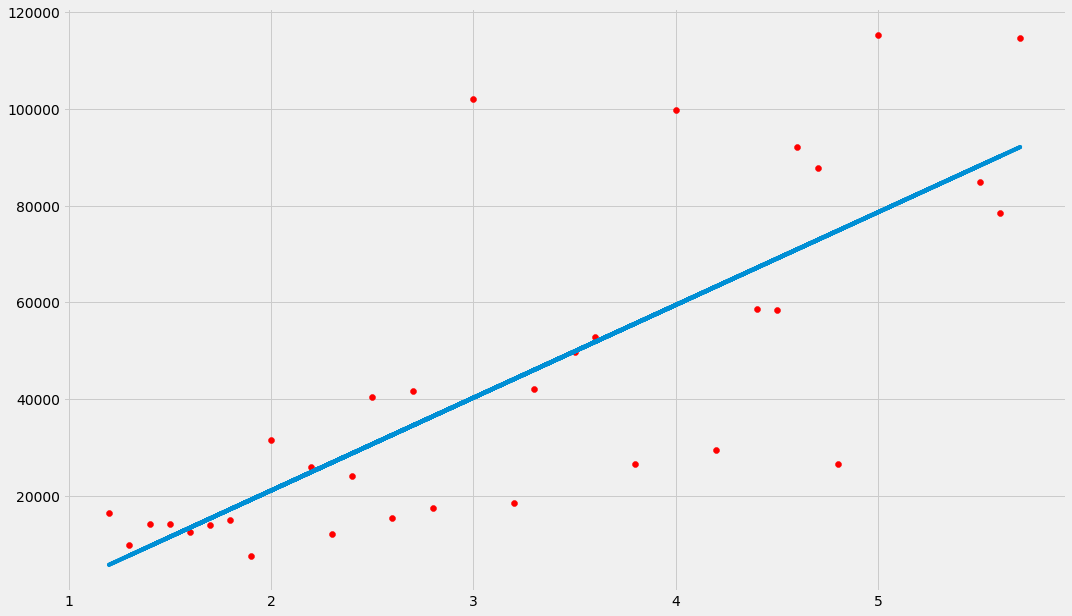

In [39]:
import matplotlib.pyplot as plt
from matplotlib import style

plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,10))
plt.scatter(Engine_types,Price_mean,color='red')
plt.plot(df.iloc[:,:1],regression.predict(df.iloc[:,:1]))